In [ ]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the dataset
file_path = "Skyserver_SQL2_27_2018 6_51_39 PM.csv"  # Replace with the correct path if needed
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.head())


In [6]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


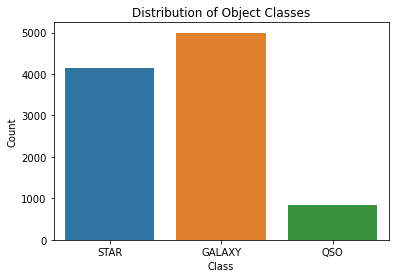

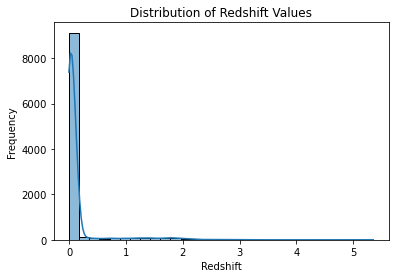

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the 'class' column
sns.countplot(data['class'])
plt.title('Distribution of Object Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Distribution of the 'redshift' column
sns.histplot(data['redshift'], bins=30, kde=True)
plt.title('Distribution of Redshift Values')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Drop unnecessary columns
columns_to_drop = ['objid', 'specobjid', 'fiberid', 'plate', 'mjd']  # Adjust as needed
data = data.drop(columns=columns_to_drop, axis=1)

# Encode 'class' column
data['class_encoded'] = data['class'].astype('category').cat.codes

# Normalize redshift
data['redshift_normalized'] = (data['redshift'] - data['redshift'].mean()) / data['redshift'].std()

# Preview the cleaned dataset
print(data.head())


           ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  rerun  camcol  field   class  redshift  class_encoded  \
0  752    301       4    267    STAR -0.000009              2   
1  752    301       4    267    STAR -0.000055              2   
2  752    301       4    268  GALAXY  0.123111              0   
3  752    301       4    269    STAR -0.000111              2   
4  752    301       4    269    STAR  0.000590              2   

   redshift_normalized  
0            -0.369713  
1            -0.369831  
2            -0.053024  
3            -0.369974  
4            -0.36817

In [9]:
from sklearn.model_selection import train_test_split

# Select features and target
X = data[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift_normalized']]  # Feature columns
y = data['class_encoded']  # Target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (8000, 8)
Testing Features Shape: (2000, 8)
Training Target Shape: (8000,)
Testing Target Shape: (2000,)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       996
           1       0.95      0.93      0.94       190
           2       1.00      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.99      0.99      0.99      2000



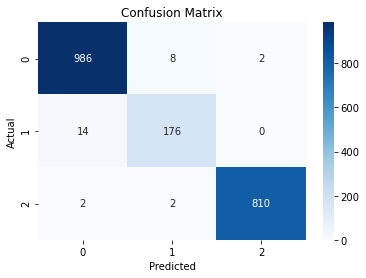

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


Refined Model Accuracy: 0.99
Classification Report (Refined Model):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       996
           1       0.98      0.93      0.95       190
           2       0.99      1.00      0.99       814

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000



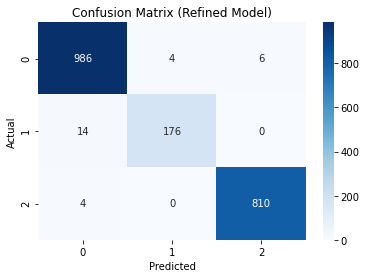

In [12]:
# Make predictions with the refined model
y_pred_refined = best_model.predict(X_test)

# Evaluate the refined model
accuracy_refined = accuracy_score(y_test, y_pred_refined)
print(f"Refined Model Accuracy: {accuracy_refined:.2f}")

# Classification report
print("Classification Report (Refined Model):")
print(classification_report(y_test, y_pred_refined))

# Confusion matrix
conf_matrix_refined = confusion_matrix(y_test, y_pred_refined)
sns.heatmap(conf_matrix_refined, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Refined Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
